In [274]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost import plot_importance

In [275]:
# Churn Telecom dataset
df = pd.read_csv('churn-in-telecoms-dataset//bigml_59c28831336c6604c800002a.csv', sep = ',')

In [276]:
# Head
df.shape

(3333, 21)

In [277]:
# Unbalanced data
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [278]:
# Transform categorical to numeric
df["international plan"] = df["international plan"].astype('category')
df["international plan"] = df["international plan"].cat.codes

In [279]:
# Transform categorical to numeric
df["voice mail plan"] = df["voice mail plan"].astype('category')
df["voice mail plan"] = df["voice mail plan"].cat.codes

In [280]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240A5CBE6D8>,
      dtype=object)

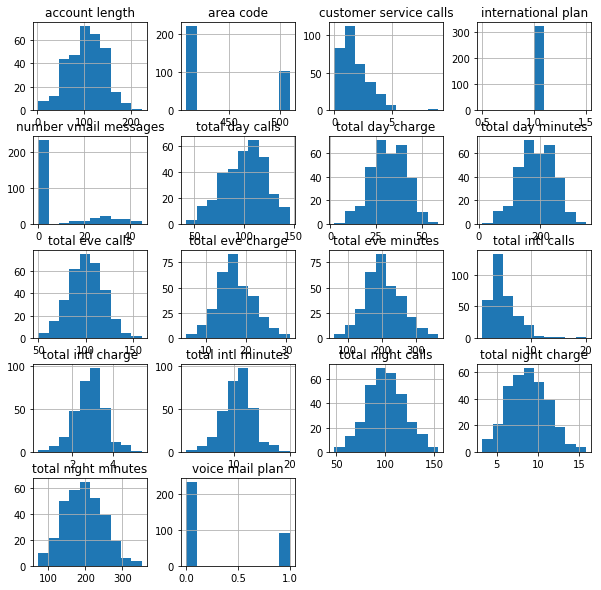

In [281]:
# Histogram
df2 = df.drop(['state', 'phone number', 'churn'], axis=1)
df2[df2['international plan'] == 1].hist(figsize = (10,10))

In [282]:
#Drop columns
df.drop(['state', 'phone number'], axis=1, inplace = True)

In [283]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [284]:
# Get dependent and independent variables
y = df['churn']
X = df.loc[:, df.columns != 'churn']

In [285]:
# Train and valid
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.3)

APPLYING DECISION TREE

In [286]:
# Decision Tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_treino, y_treino)
p_tree = clf.predict(X_valid)    
acc = np.mean(y_valid == p_tree)
print("Acc: ", acc)
print("AUC: ", roc_auc_score(y_valid, p_tree))
print("F1-Score: ", f1_score(y_valid, p_tree))

Acc:  0.898
AUC:  0.7956458318707635
F1-Score:  0.6577181208053691


In [287]:
# Metrics to evaluate the model
print(classification_report(y_valid, p_tree))

              precision    recall  f1-score   support

       False       0.94      0.94      0.94       849
        True       0.67      0.65      0.66       151

    accuracy                           0.90      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.90      0.90      0.90      1000



In [288]:
# Use smote library for not balanced data
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (5700, 18)
After OverSampling, the shape of train_y: (5700,) 

After OverSampling, counts of label '1': 2850
After OverSampling, counts of label '0': 2850


In [289]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X_train_res, y_train_res, test_size=0.3)

In [290]:
# Running Decision Tree after smote

clf = tree.DecisionTreeClassifier()
clf.fit(X_treino, y_treino)
p_tree = clf.predict(X_valid)    
acc = np.mean(y_valid == p_tree)
print("Acc: ", acc)
print("AUC: ", roc_auc_score(y_valid, p_tree))
print("F1-Score: ", f1_score(y_valid, p_tree))

Acc:  0.8748538011695907
AUC:  0.874894668300904
F1-Score:  0.8789592760180995


In [291]:
# Other metrics to evaluate after smote
print(classification_report(y_valid, p_tree))

              precision    recall  f1-score   support

       False       0.90      0.84      0.87       856
        True       0.85      0.91      0.88       854

    accuracy                           0.87      1710
   macro avg       0.88      0.87      0.87      1710
weighted avg       0.88      0.87      0.87      1710



In [292]:
# Pandas confusion matrix

data = {'y_Actual':    y_valid,
        'y_Predicted': p_tree}

df_pred = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_pred['y_Actual'], df_pred['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,False,True
Actual,,
False,719,137
True,77,777


In [293]:
y_train_res = pd.DataFrame(y_train_res, columns = ['y_train_res'])

In [294]:
# Using repeat k fold for better splits
decision_tree = []
decision_tree_auc = []
decision_tree_f1 = []
kf = RepeatedKFold(n_splits=2, n_repeats=30, random_state=20)

for linhas_treino, linhas_valid in kf.split(X_train_res):

    X_treino, X_valid = X_train_res.iloc[linhas_treino], X_train_res.iloc[linhas_valid]
    y_treino, y_valid = y_train_res['y_train_res'].iloc[linhas_treino], y_train_res['y_train_res'].iloc[linhas_valid]
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_treino, y_treino)
    p_tree = clf.predict(X_valid)
    acc = np.mean(y_valid == p_tree)
    decision_tree.append(acc)
    decision_tree_auc.append(roc_auc_score(y_valid, p_tree))
    decision_tree_f1.append(f1_score(y_valid, p_tree))

(array([ 3.,  3.,  6.,  6.,  7., 15.,  9.,  6.,  3.,  2.]),
 array([0.8277193 , 0.83238596, 0.83705263, 0.8417193 , 0.84638596,
        0.85105263, 0.8557193 , 0.86038596, 0.86505263, 0.8697193 ,
        0.87438596]),
 <a list of 10 Patch objects>)

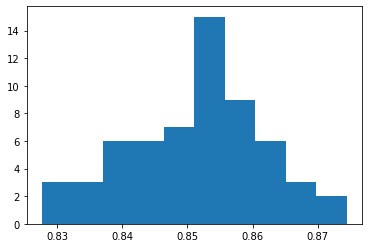

In [295]:
# Accuracy Decision Tree
plt.hist(decision_tree)

(array([ 3.,  3.,  6.,  6.,  7., 15., 10.,  5.,  3.,  2.]),
 array([0.82769384, 0.83236322, 0.83703259, 0.84170197, 0.84637134,
        0.85104071, 0.85571009, 0.86037946, 0.86504884, 0.86971821,
        0.87438758]),
 <a list of 10 Patch objects>)

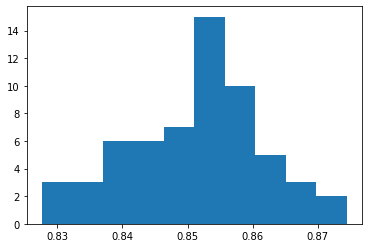

In [296]:
# Auc Decision Tree
plt.hist(decision_tree_auc)

(array([ 4.,  1.,  5.,  6.,  8., 18.,  7.,  6.,  3.,  2.]),
 array([0.82988425, 0.83461866, 0.83935308, 0.84408749, 0.84882191,
        0.85355632, 0.85829073, 0.86302515, 0.86775956, 0.87249398,
        0.87722839]),
 <a list of 10 Patch objects>)

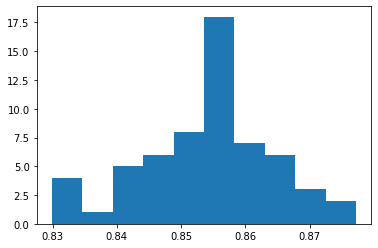

In [297]:
# F1 Score Decision
plt.hist(decision_tree_f1)

APPLYING XGBOOST FOR UNBALANCED DATA

In [298]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.3)

In [299]:
# Use smote library for not balanced data
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (5700, 18)
After OverSampling, the shape of train_y: (5700,) 

After OverSampling, counts of label '1': 2850
After OverSampling, counts of label '0': 2850


In [300]:
model=xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.15,max_depth = 5, alpha = 10, n_estimators = 200)
model.fit(X_train_res, y_train_res)
p_xg = model.predict(X_valid) 
print(classification_report(y_valid, p_xg))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       855
        True       0.98      0.98      0.98       145

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [301]:
# Pandas confusion matrix

data = {'y_Actual':    y_valid,
        'y_Predicted': p_xg}

df_pred = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_pred['y_Actual'], df_pred['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,False,True
Actual,,
False,852,3
True,3,142


In [310]:
y_train_res = pd.DataFrame(y_train_res, columns = ['y_train_res'])

In [311]:
# Using repeat k fold for better splits
xb_acc = []
xb_auc = []
xb_f1 = []
kf = RepeatedKFold(n_splits=2, n_repeats=30, random_state=10)

for linhas_treino, linhas_valid in kf.split(X_train_res):

    X_treino, X_valid = X_train_res.iloc[linhas_treino], X_train_res.iloc[linhas_valid]
    y_treino, y_valid =y_train_res['y_train_res'].iloc[linhas_treino], y_train_res['y_train_res'].iloc[linhas_valid]
    
    model=xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.15,max_depth = 5, alpha = 10, n_estimators = 200)
    model.fit(X_treino, y_treino)
    p_xg = model.predict(X_valid)
    acc = np.mean(y_valid == p_xg)
    xb_acc.append(acc)
    xb_auc.append(roc_auc_score(y_valid, p_xg))
    xb_f1.append(f1_score(y_valid, p_xg))

(array([ 4.,  3.,  5.,  8., 13., 11.,  7.,  3.,  4.,  2.]),
 array([0.90877193, 0.9105614 , 0.91235088, 0.91414035, 0.91592982,
        0.9177193 , 0.91950877, 0.92129825, 0.92308772, 0.92487719,
        0.92666667]),
 <a list of 10 Patch objects>)

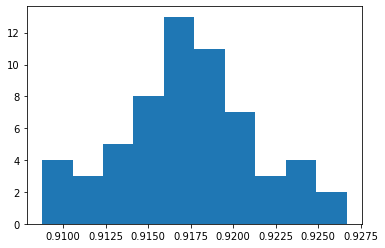

In [312]:
# Accuracy Xb
plt.hist(xb_acc)

(array([ 4.,  3.,  5.,  6., 16., 11.,  7.,  2.,  4.,  2.]),
 array([0.90885524, 0.9106311 , 0.91240697, 0.91418283, 0.9159587 ,
        0.91773456, 0.91951043, 0.92128629, 0.92306216, 0.92483802,
        0.92661389]),
 <a list of 10 Patch objects>)

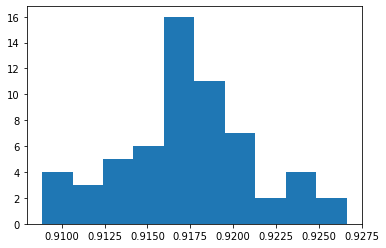

In [313]:
# Auc Xb
plt.hist(xb_auc)

(array([ 3.,  3.,  3.,  8., 14., 15.,  7.,  0.,  5.,  2.]),
 array([0.90553506, 0.90748782, 0.90944059, 0.91139336, 0.91334613,
        0.9152989 , 0.91725167, 0.91920444, 0.92115721, 0.92310998,
        0.92506275]),
 <a list of 10 Patch objects>)

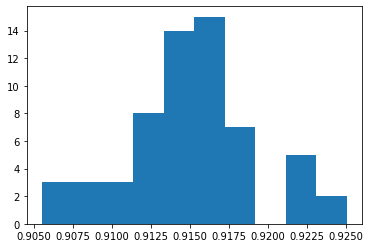

In [314]:
# F1 Score Xb
plt.hist(xb_f1)

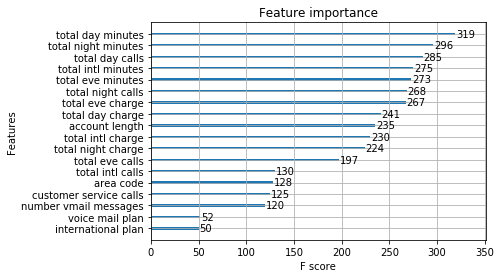

In [315]:
# Variables most important for the model
plot_importance(model)